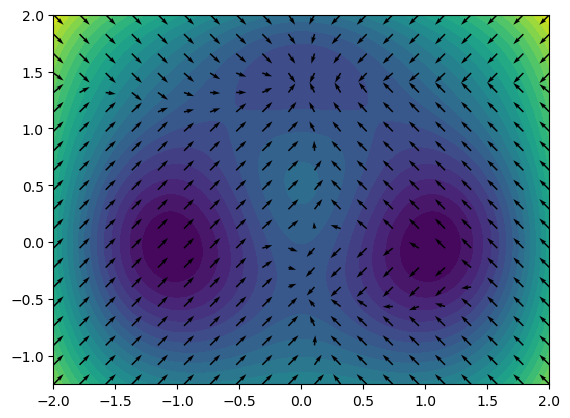

In [7]:
from TD3 import TD3
from PIL import Image
import os
import matplotlib.pyplot as plt
import torch
import numpy as np


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def potential(rugged, q):
    qx = q[...,0:1]
    qy = q[...,1:2]
    V = 3*np.exp(-qx**2-(qy-1/3)**2)-3*np.exp(-qx**2-(qy-5/3)**2)-5*np.exp(-(qx-1)**2-qy**2)-5*np.exp(-(qx+1)**2-qy**2)+0.2*qx**4+0.2*(qy-0.2)**4
    return V[..., 0]

N = 100
xx = np.linspace(-2, 2, N)
yy = np.linspace(-1.25, 2, N)
[X, Y] = np.meshgrid(xx, yy)
rugged = True
env_name = 'Beta6p67'

pts = np.concatenate((np.expand_dims(X, axis=2), np.expand_dims(Y, axis=2)), axis=2)
W = potential(rugged, pts)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.contourf(X, Y, W, levels=29)

random_seed = 0
n_episodes = 3
lr = 0.002
max_timesteps = 2000
render = True
save_gif = False

filename = "TD3_{}_{}".format(env_name, random_seed)
filename += ''
directory = "preTrained/{}".format(env_name)

state_dim = 2  
action_dim = 2  
max_action = 1

policy = TD3(lr, state_dim, action_dim, max_action)

policy.load_actor(directory, filename)

N = 20
X, Y = torch.meshgrid(torch.linspace(-2, 2, N), torch.linspace(-1.25, 2, N))
data = torch.cat((X.reshape(-1,1), Y.reshape(-1, 1)), 1)
learned_vector_x = ((policy.actor(data.to(device)))[:, :1]).reshape((N, N)).detach().cpu()
learned_vector_y = ((policy.actor(data.to(device)))[:, 1:]).reshape((N, N)).detach().cpu()

plt.quiver(X.numpy(), Y.numpy(), learned_vector_x.numpy(), learned_vector_y.numpy())